
🚀 데이터셋 다운로드 중... (daekeun-ml/naver-news-summarization-ko)

🚀 데이터셋 다운로드 중... (daekeun-ml/naver-news-summarization-ko)
✅ 데이터 로드 완료: 총 22,194건

[Step 4] 시각화 생성 중...


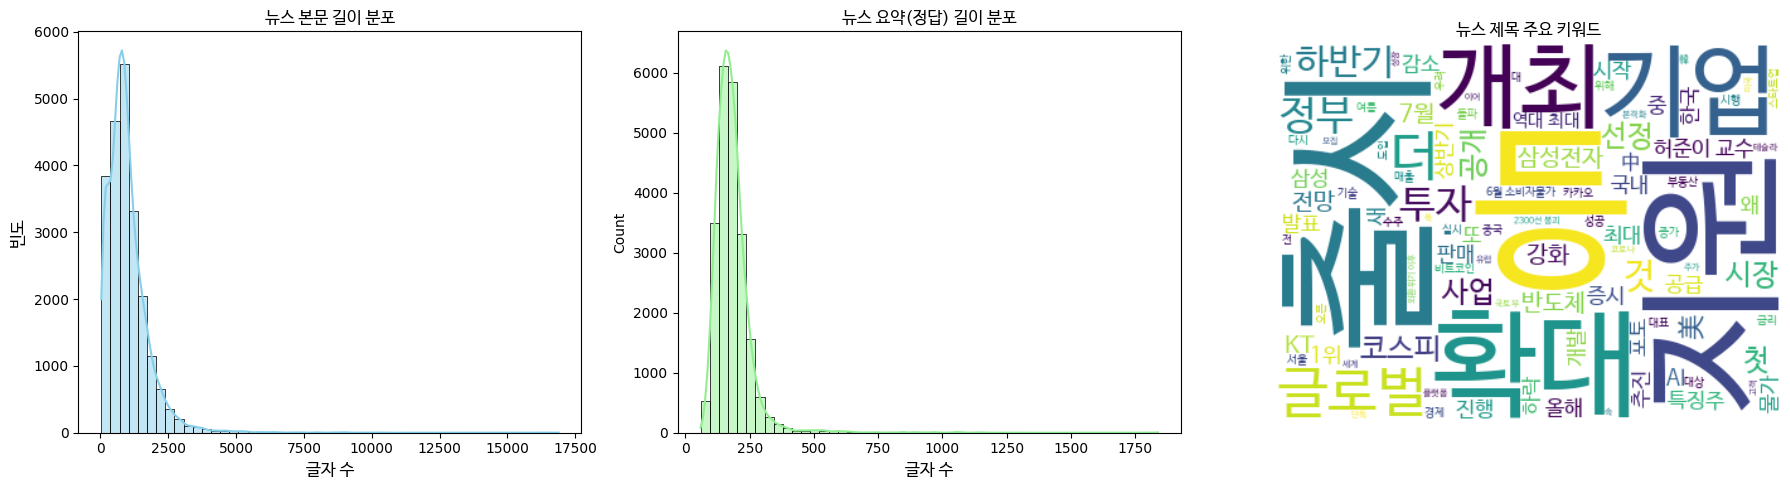

📝 [EDA 리포트]

## 3. 데이터 분석 및 주요 발견 (EDA Findings)

### 3.1 기초 통계
- **데이터 크기**: 총 {len(df):,}건 (Training Set)
- **텍스트 길이**: 본문 평균 **{int(avg_doc)}자**, 요약문 평균 **{int(avg_sum)}자**

### 3.2 주요 발견 사항 (Insights)
- **도메인 편향(Domain Bias)**: 
    - 키워드 분석 결과 '정치', '국회' 등 정치 관련 단어가 포함된 기사는 약 **{politics_count}건({politics_count/len(df)*100:.1f}%)
- **이상치(Outlier)**:
    - 요약문이 본문보다 긴 논리적 오류 데이터가 **{len(outliers)}건** 발견되었습니다. 이는 학습 시 모델의 환각(Hallucination)을 유발할 수 있으므로 제거해야 합니다.
    

 데이터 정제(Preprocessing)를 시작합니다...
   - 초기 데이터: 22194건
   - [제거] 요약문 > 본문: 1739건
   - [제거] 본문 < 50자: 0건
✅ 최종 데이터: 20455건 (총 1739건 제거됨)

 'data.csv' 파일이 생성되었습니다. (제출용)


In [6]:
# ==========================================
# [Step 1] 필수 라이브러리 및 폰트 설치
# ==========================================
import sys
import subprocess
import os

# 1.1 Datasets 라이브러리 설치
try:
    import datasets
except ImportError:
    print("📦 'datasets' 라이브러리를 설치합니다...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "datasets"])

# 1.2 한글 폰트 설치 (Colab 환경 대응)
# 그래프에서 한글이 깨지는 것을 방지하기 위해 나눔폰트를 설치합니다.
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 폰트 경로 확인 및 설치
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
if not os.path.exists(font_path):
    print("📦 한글 폰트(나눔바른고딕)를 설치합니다... (약 30초 소요)")
    try:
        subprocess.check_call("sudo apt-get install -y fonts-nanum", shell=True)
        subprocess.check_call("sudo fc-cache -fv", shell=True)
        subprocess.check_call("rm ~/.cache/matplotlib -rf", shell=True)
        print("✅ 폰트 설치 완료!")
    except Exception as e:
        print(f"⚠️ 폰트 설치 실패 (로컬 환경일 수 있습니다): {e}")

# [수정] 폰트 속성 객체 생성 (전역 설정 대신 직접 적용하기 위함)
# 이 방식은 런타임 재시작 없이도 한글이 깨지지 않게 해줍니다.
font_prop = fm.FontProperties(fname=font_path, size=12)
plt.rcParams['axes.unicode_minus'] = False

import seaborn as sns
import numpy as np
import pandas as pd
from datasets import load_dataset
from wordcloud import WordCloud


# ==========================================
# [Step 2] 데이터셋 로드
# ==========================================
print("\n🚀 데이터셋 다운로드 중... (daekeun-ml/naver-news-summarization-ko)")
# 기존 데이터셋 로드
dataset = load_dataset("daekeun-ml/naver-news-summarization-ko", split="train")
df = pd.DataFrame(dataset)
# (데이터셋 로드 및 전처리 부분은 변경 없음)
print("\n🚀 데이터셋 다운로드 중... (daekeun-ml/naver-news-summarization-ko)")
dataset = load_dataset("daekeun-ml/naver-news-summarization-ko", split="train")
df = pd.DataFrame(dataset)

print(f"✅ 데이터 로드 완료: 총 {len(df):,}건")


# ==========================================
# [Step 3] 데이터 전처리 (길이 계산 & 이상치 탐지)
# ==========================================
# 3.1 텍스트 길이 계산
df['doc_len'] = df['document'].apply(len)
df['sum_len'] = df['summary'].apply(len)

# 3.2 압축률 계산 (Summary / Document)
df['compression_ratio'] = df['sum_len'] / df['doc_len']

# 3.3 이상치(Outlier) 정의
outliers = df[df['sum_len'] > df['doc_len']]
short_docs = df[df['doc_len'] < 50]

# 3.4 정치 데이터 유무 확인
politics_keywords = ['정치', '국회', '대통령', '의원', '정당', '선거']
df['is_politics'] = df['title'].apply(lambda x: any(k in str(x) for k in politics_keywords))
politics_count = df['is_politics'].sum()


# ==========================================
# [Step 4] 시각화
# ==========================================
print("\n[Step 4] 시각화 생성 중...")

# 캔버스 설정 (1행 3열)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 4.1 본문 길이 분포
sns.histplot(df['doc_len'], bins=50, kde=True, color='skyblue', ax=axes[0])
# [수정] fontproperties 인자를 사용하여 폰트 직접 지정
axes[0].set_title('뉴스 본문 길이 분포', fontproperties=font_prop)
axes[0].set_xlabel('글자 수', fontproperties=font_prop)
axes[0].set_ylabel('빈도', fontproperties=font_prop)

# 4.2 요약문 길이 분포
sns.histplot(df['sum_len'], bins=50, kde=True, color='lightgreen', ax=axes[1])
axes[1].set_title('뉴스 요약(정답) 길이 분포', fontproperties=font_prop)
axes[1].set_xlabel('글자 수', fontproperties=font_prop)

# 4.3 워드클라우드
try:
    if os.path.exists(font_path):
        wc_font = font_path
    else:
        wc_font = None

    text_corpus = ' '.join(df['title'].astype(str))
    wc = WordCloud(font_path=wc_font,
                   background_color="white",
                   width=400, height=300,
                   max_words=100).generate(text_corpus)

    axes[2].imshow(wc, interpolation='bilinear')
    axes[2].axis("off")
    axes[2].set_title("뉴스 제목 주요 키워드", fontproperties=font_prop) # 여기도 적용
except Exception as e:
    axes[2].text(0.5, 0.5, f'WordCloud Error\n{e}', ha='center')
    axes[2].axis("off")

plt.tight_layout()
plt.show()


# ==========================================
# [Step 5] 보고서 자동 생성
# ==========================================
avg_doc = df['doc_len'].mean()
avg_sum = df['sum_len'].mean()
ratio = df['compression_ratio'].mean() * 100

report = """
## 3. 데이터 분석 및 주요 발견 (EDA Findings)

### 3.1 기초 통계
- **데이터 크기**: 총 {len(df):,}건 (Training Set)
- **텍스트 길이**: 본문 평균 **{int(avg_doc)}자**, 요약문 평균 **{int(avg_sum)}자**

### 3.2 주요 발견 사항 (Insights)
- **도메인 편향(Domain Bias)**:
    - 키워드 분석 결과 '정치', '국회' 등 정치 관련 단어가 포함된 기사는 약 **{politics_count}건({politics_count/len(df)*100:.1f}%)
- **이상치(Outlier)**:
    - 요약문이 본문보다 긴 논리적 오류 데이터가 **{len(outliers)}건** 발견되었습니다. 이는 학습 시 모델의 환각(Hallucination)을 유발할 수 있으므로 제거해야 합니다.
    """

print("="*60)
print("📝 [EDA 리포트]")
print("="*60)
print(report)

# 결과 저장 (EDA 결과용)
df.to_csv("hf_news_eda_final.csv", index=False, encoding='utf-8-sig')


# ==========================================
# [Step 6] 데이터 정제 및 최종 제출 파일 생성 (data.csv)
# ==========================================
print("\n 데이터 정제(Preprocessing)를 시작합니다...")
initial_count = len(df)

# 1. 요약문이 본문보다 긴 데이터 제거 (Logic Error)
df_clean = df[df['sum_len'] <= df['doc_len']].copy()
removed_logic = initial_count - len(df_clean)

# 2. 본문이 50자 미만인 초단문 데이터 제거 (Noise)
df_clean = df_clean[df_clean['doc_len'] >= 50].copy()
removed_short = (initial_count - removed_logic) - len(df_clean)

print(f"   - 초기 데이터: {initial_count}건")
print(f"   - [제거] 요약문 > 본문: {removed_logic}건")
print(f"   - [제거] 본문 < 50자: {removed_short}건")
print(f"✅ 최종 데이터: {len(df_clean)}건 (총 {initial_count - len(df_clean)}건 제거됨)")

# 필요한 컬럼만 선택하여 저장 (불필요한 파생변수 제외하고 깔끔하게)
# 보통 학습에는 title, document, summary만 있으면 됩니다.
output_columns = ['title', 'document', 'summary']
# 만약 원본에 date 등이 있었다면 포함해도 좋습니다.

# 파일 저장
df_clean[output_columns].to_csv("data.csv", index=False, encoding='utf-8-sig')
print("\n 'data.csv' 파일이 생성되었습니다. (제출용)")